# Clustering Project
## Absenteeism at work <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br><br>


Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

## Attribute Information:

1. Individual identification (ID) <br>
2. Reason for absence (ICD). Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows: <br>

 0 No absence <br>

 I Certain infectious and parasitic diseases<br>
II Neoplasms <br>
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism <br>
IV Endocrine, nutritional and metabolic diseases <br>
V Mental and behavioural disorders <br>
VI Diseases of the nervous system <br>
VII Diseases of the eye and adnexa <br>
VIII Diseases of the ear and mastoid process <br>
IX Diseases of the circulatory system <br>
X Diseases of the respiratory system <br>
XI Diseases of the digestive system <br>
XII Diseases of the skin and subcutaneous tissue <br>
XIII Diseases of the musculoskeletal system and connective tissue <br>
XIV Diseases of the genitourinary system <br>
XV Pregnancy, childbirth and the puerperium <br>
XVI Certain conditions originating in the perinatal period <br>
XVII Congenital malformations, deformations and chromosomal abnormalities <br>
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified <br>
XIX Injury, poisoning and certain other consequences of external causes <br>
XX External causes of morbidity and mortality <br>
XXI Factors influencing health status and contact with health services. <br>

 #### Categories without (CID): 
 XXII Patient follow-up <br>
XXIII Medical consultation <br> 
XXIV Blood donation <br>
XXV Laboratory examination <br> 
XXVI Unjustified absence <br> 
XXVII Physiotherapy <br>
XXVIII Dental consultation <br>

3. Month of absence <br>
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) <br>
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) <br>
6. Transportation expense <br>
7. Distance from Residence to Work (kilometers) <br>
8. Service time <br>
9. Age <br>
10. Work load Average/day <br>
11. Hit target <br>
12. Disciplinary failure (yes=1; no=0) <br>
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) <br>
14. Son (number of children) <br>
15. Social drinker (yes=1; no=0) <br>
16. Social smoker (yes=1; no=0) <br>
17. Pet (number of pet) <br>
18. Weight <br>
19. Height <br>
20. Body mass index <br> <br>
21. Absenteeism time in hours (target - for final evaluation only)

#### Timing the script

In [73]:
from datetime import datetime
startTime = datetime.now()

#### Quick fix for the dark theme plotting to have readable labels:

In [74]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

#### Basic libraries:

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

#### Importing the data:

In [76]:
df = pd.read_csv('Absenteeism_at_work.csv')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


## Exploratory Data Analysis (EDA):

#### Basic info, only numerical data:

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

#### Checking for missing data:

In [78]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

#### Basic statistics:

In [79]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### Reasons for absence:

In [80]:
print(sorted(df['Reason for absence'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]


Reason 20 (External causes of morbidity and mortality) does not occur among respondents.

In [81]:
reasons = {0: 'Present',
           
           1: 'Certain infectious and parasitic diseases',
           2: 'Neoplasms',
           3: 'Diseases of the blood and immune disorders',
           4: 'Endocrine, nutritional and metabolic diseases',
           5: 'Mental and behavioural disorders',
           6: 'Diseases of the nervous system',
           7: 'Diseases of the eye and adnexa',
           8: 'Diseases of the ear and mastoid process',
           9: 'Diseases of the circulatory system',
           10: 'Diseases of the respiratory system',
           11: 'Diseases of the digestive system',
           12: 'Diseases of the skin and subcutaneous tissue',
           13: 'Diseases of the musculoskeletal system',
           14: 'Diseases of the genitourinary system',

           15: 'Pregnancy, childbirth and the puerperium',
           16: 'Certain conditions in the perinatal period',
           17: 'Congenital malformations, deformations',
           
           18: 'Symptoms, signs and abnormal clinical findings',
           19: 'Injury, poisoning and certain other consequences',
           20: 'External causes of morbidity and mortality',
           21: 'Factors influencing health status',

           22: 'Patient follow-up',
           23: 'Medical consultation',
           24: 'Blood donation',
           25: 'Laboratory examination',
           26: 'Unjustified absence',
           27: 'Physiotherapy',
           28: 'Dental consultation'}

df['Reason description'] = df['Reason for absence'].map(reasons)

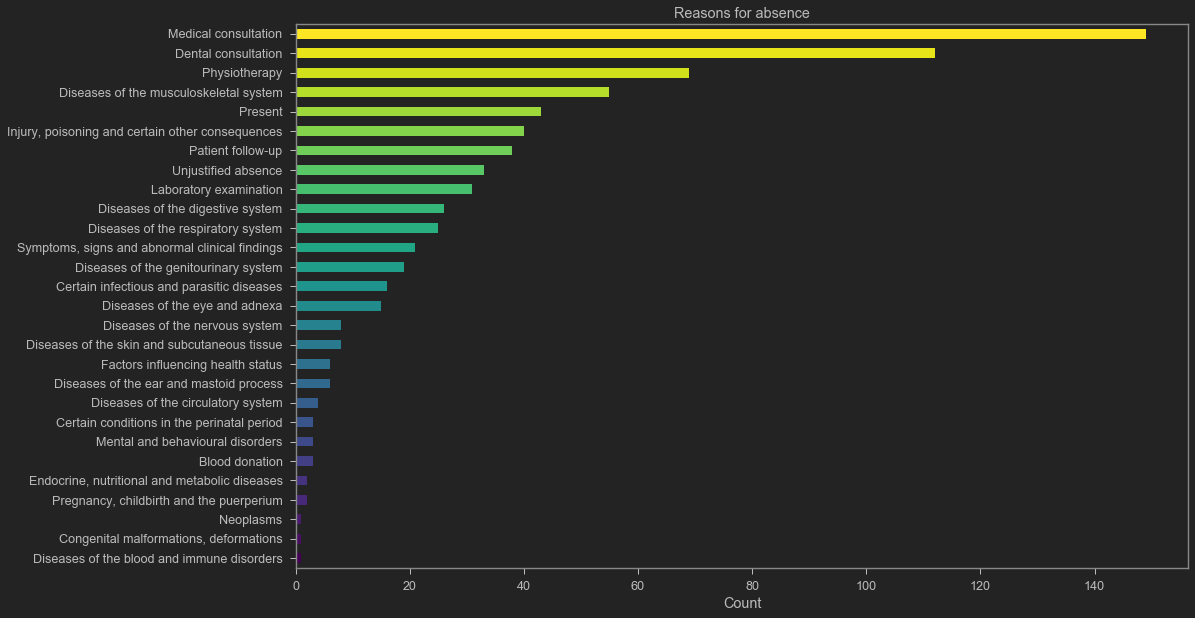

In [82]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 28) #import colormap

plt.figure(figsize=(16,10))

df['Reason description'].value_counts().sort_values().plot(kind='barh', 
                                                           color=viridis(np.linspace(0, 1, 28)))

plt.xlabel('Count')
plt.title('Reasons for absence')
plt.show()

#### Drop columns:
ID is like a name and does not add any value, so it can be dropped. Similarly descriptions from above.

In [83]:
df.drop('ID', axis=1, inplace=True)
df.drop('Reason description', axis=1, inplace=True)

#### Grouping 'Reason for absence' into 5 main categories:
   0 - Present (to be dropped to avoid data leakage) <br>
   1-14 - Diseases <br>
   15-17 - Pregnacy related <br>
   18-21 - Various injuries <br>
   22-28 - Light, unserious reasons

In [84]:
def reason(record):
    if record == 0:
        return 'Present'
    elif (record > 0) & (record < 15):
        return 'Disease'
    elif (record > 14) & (record < 18):
        return 'Pregnacy'
    elif (record > 17) & (record < 22):
        return 'Injury'
    else:
        return 'Trivial'
    
df['Reason for absence'] = df['Reason for absence'].apply(reason)

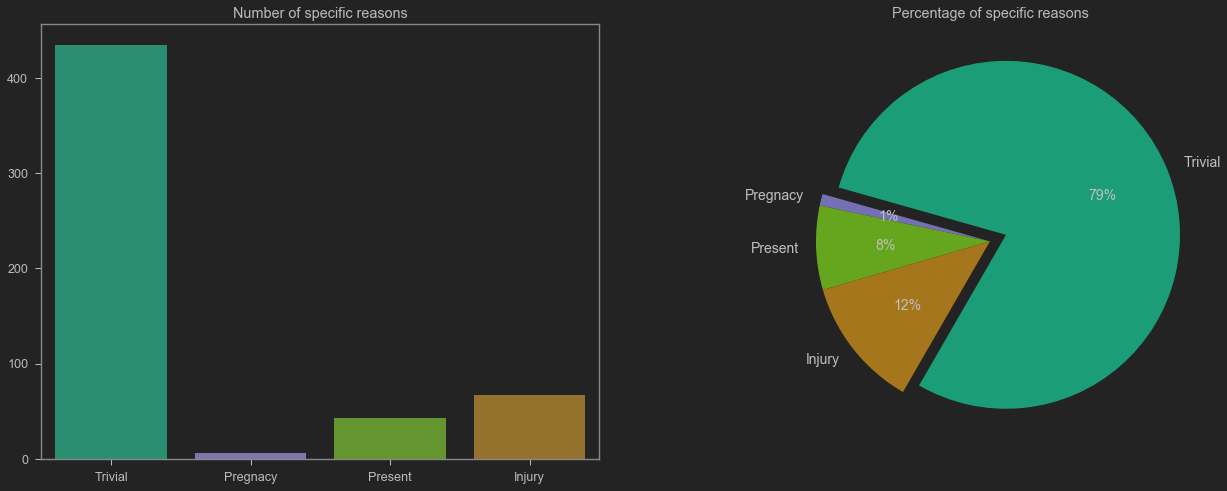

In [85]:
trivial  = df[df['Reason for absence']=='Trivial']['Reason for absence'].count()    #int
pregnacy = df[df['Reason for absence']=='Pregnacy']['Reason for absence'].count()   #int
present  = df[df['Reason for absence']=='Present']['Reason for absence'].count()    #int
injury   = df[df['Reason for absence']=='Injury']['Reason for absence'].count()     #int

dark = cm.get_cmap('Dark2') #import colormap
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(22, 8))

axes[0]=plt.subplot(1,2,1)
sns.barplot(y = [trivial, pregnacy, present, injury],
            x = ['Trivial','Pregnacy', 'Present','Injury'], 
            palette=dark(np.linspace(0, 2, 8)))
plt.title('Number of specific reasons')

axes[1]=plt.subplot(1,2,2)
plt.pie([trivial, pregnacy, present, injury],
        labels = ['Trivial','Pregnacy', 'Present','Injury'],
        autopct = '%1.0f%%',
        textprops={'fontsize': 14, 'color':'silver'},
        startangle = -120,
        explode = [0.1,0,0,0],
        colors = dark(np.linspace(0, 2, 8)))
plt.title("Percentage of specific reasons")

plt.show()

In [86]:
# Standard pie plot:
# plt.figure(figsize=(7,7))
# df['Reason for absence'].value_counts().plot(kind='pie', label='');

Trivial reasons for absence such as dental appointment are the most common. Large imbalance between present and absent records.

### Month:

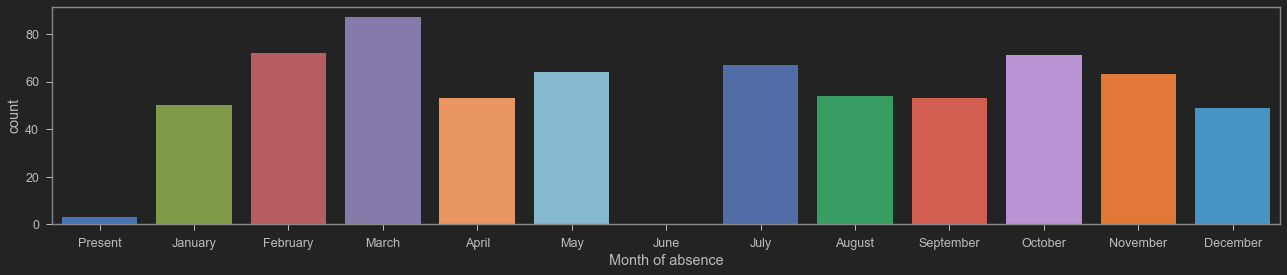

In [87]:
d={0:'Present', 1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
   7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['Month of absence'] = df['Month of absence'].map(d)

plt.figure(figsize=(22,4))
sns.countplot(df['Month of absence'],
              order=['Present', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 
                     'August', 'September', 'October', 'November', 'December']);

#### Day of the week:

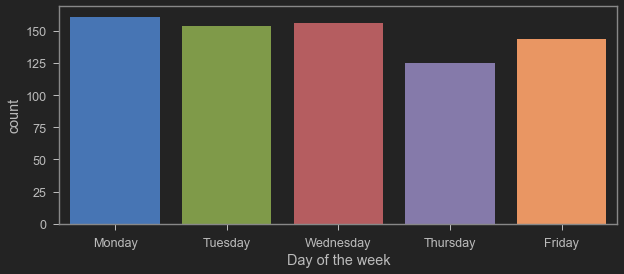

In [88]:
d={2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
df['Day of the week'] = df['Day of the week'].map(d)

plt.figure(figsize=(10,4))
sns.countplot(df['Day of the week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']);

#### Seasons:

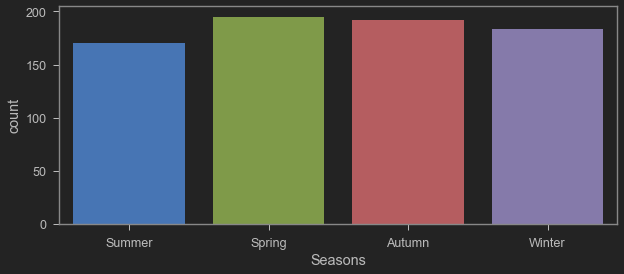

In [89]:
d={1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
df['Seasons'] = df['Seasons'].map(d)

plt.figure(figsize=(10,4))
sns.countplot(df['Seasons']);

#### Transportation expense:

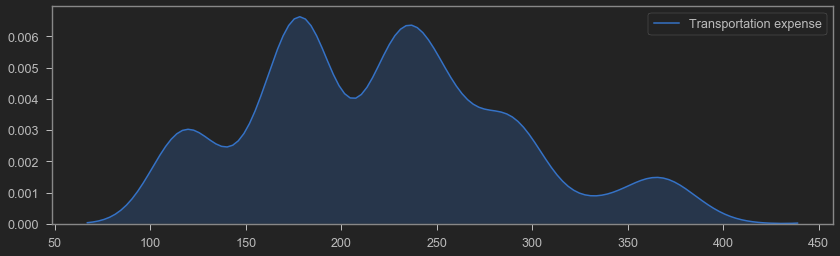

In [90]:
plt.figure(figsize=(14,4))
sns.kdeplot(df['Transportation expense'], shade=True);

#### Distance from residence to work:

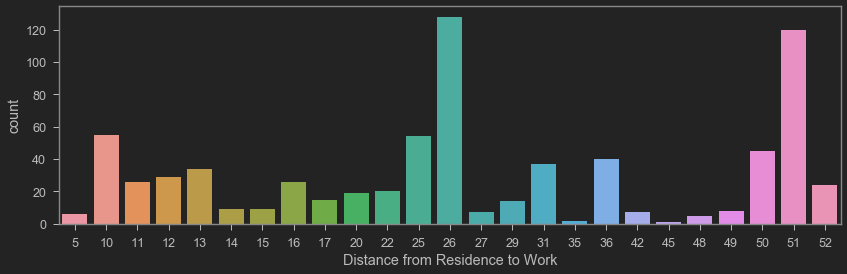

In [91]:
plt.figure(figsize=(14,4))
sns.countplot(df['Distance from Residence to Work']);

#### Service time:

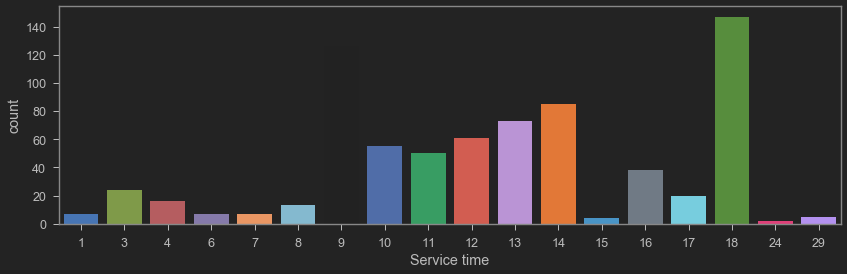

In [92]:
plt.figure(figsize=(14,4))
sns.countplot(df['Service time']);

#### Age:

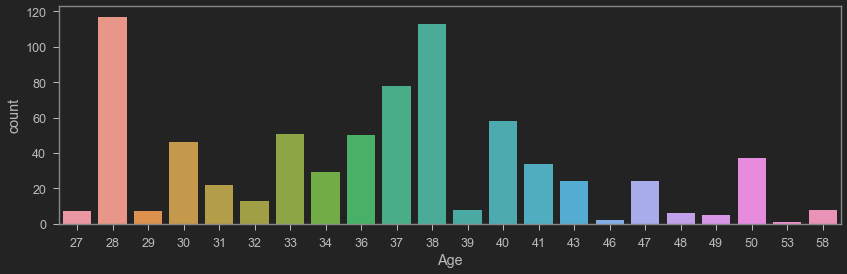

In [93]:
plt.figure(figsize=(14,4))
sns.countplot(df['Age']);

#### Workload Average/day:

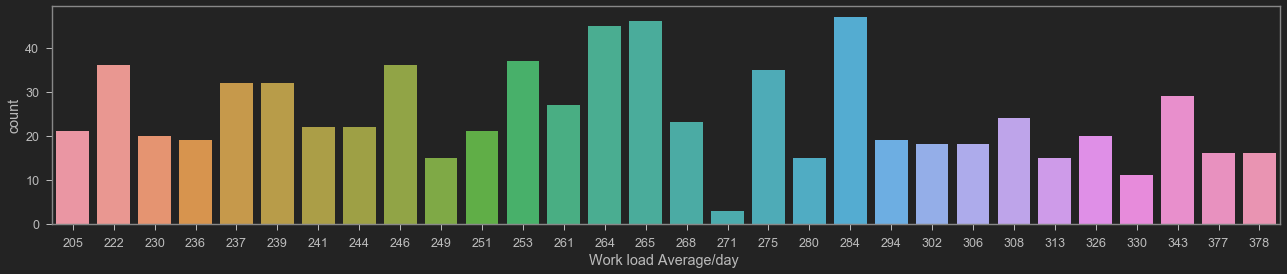

In [94]:
plt.figure(figsize=(22,4))
sns.countplot(df['Work load Average/day '].astype(int));

#### Hit target:

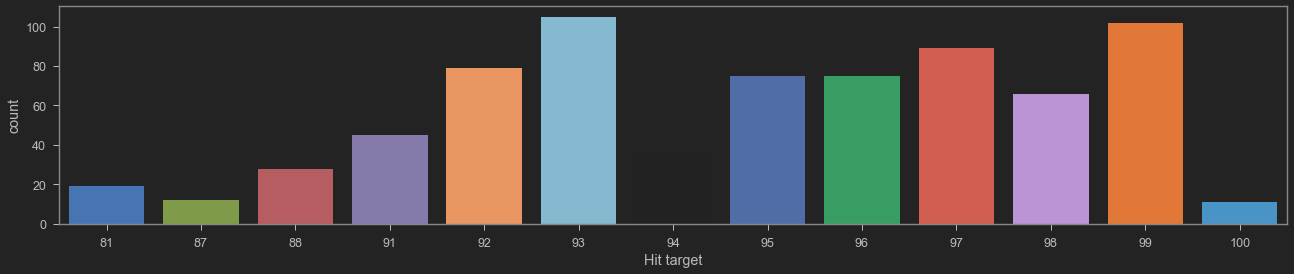

In [95]:
plt.figure(figsize=(22,4))
sns.countplot(df['Hit target']);

#### Disciplinary failure:
1 - Yes, 0 - No

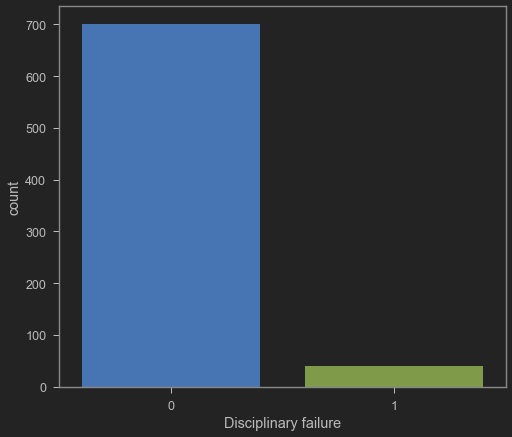

In [96]:
sns.countplot(df['Disciplinary failure']);

#### Education 
High school (1), Graduate (2), Postgraduate (3), Master and doctor (4)

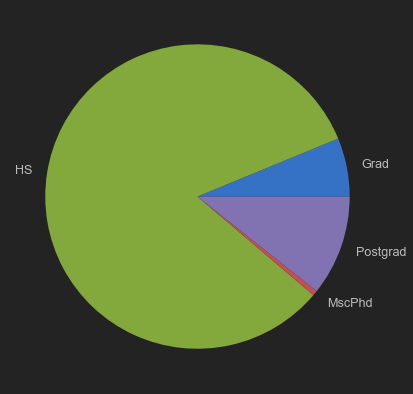

In [97]:
d={1:'HS', 2:'Grad', 3:'Postgrad', 4:'MscPhd'}
df['Education'] = df['Education'].map(d)

plt.figure(figsize=(7,7))
df.groupby('Education').size().plot(kind='pie', label='');

#### Number of children:

In [98]:
df=df.rename(columns = {'Son':'Kids'})

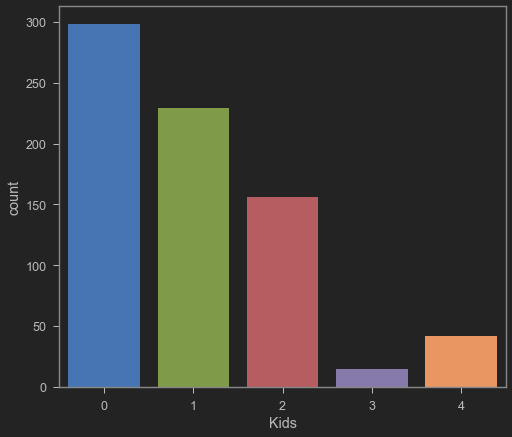

In [99]:
sns.countplot(df['Kids']);

#### Social drinker:

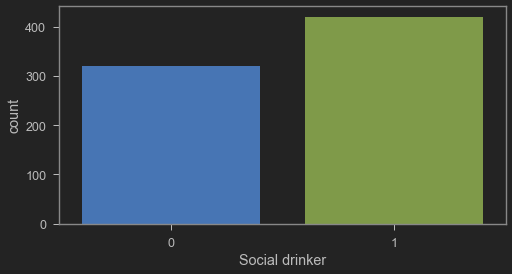

In [100]:
plt.figure(figsize=(8,4))
sns.countplot(df['Social drinker']);

#### Social smoker:

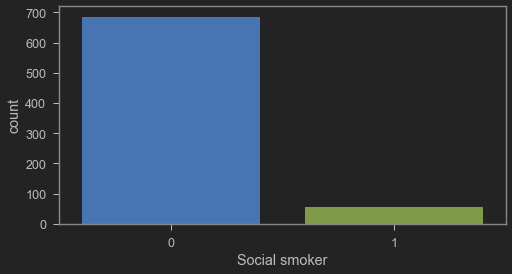

In [101]:
plt.figure(figsize=(8,4))
sns.countplot(df['Social smoker']);

#### Number of pets:

In [102]:
df=df.rename(columns = {'Pet':'Pets'})

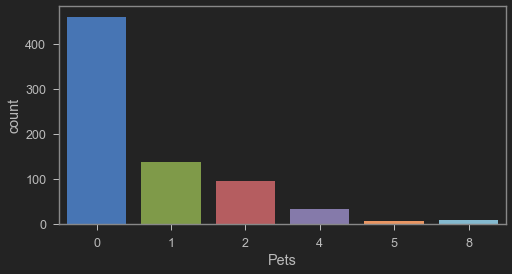

In [103]:
plt.figure(figsize=(8,4))
sns.countplot(df['Pets']);

#### Weight:

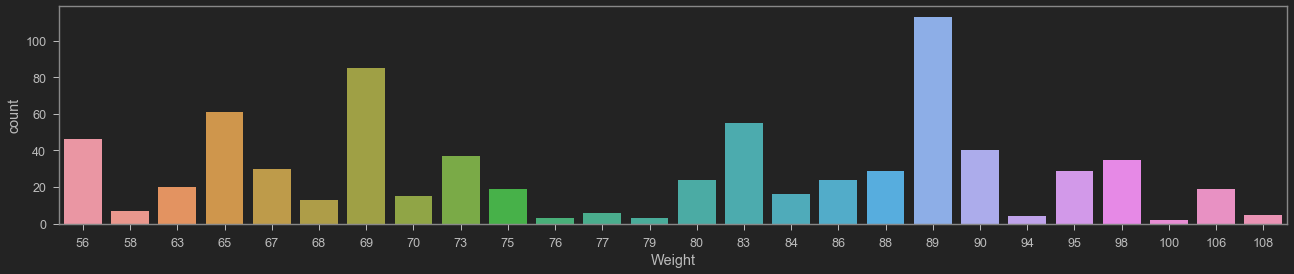

In [104]:
plt.figure(figsize=(22,4))
sns.countplot(df['Weight']);

#### Body mass index:

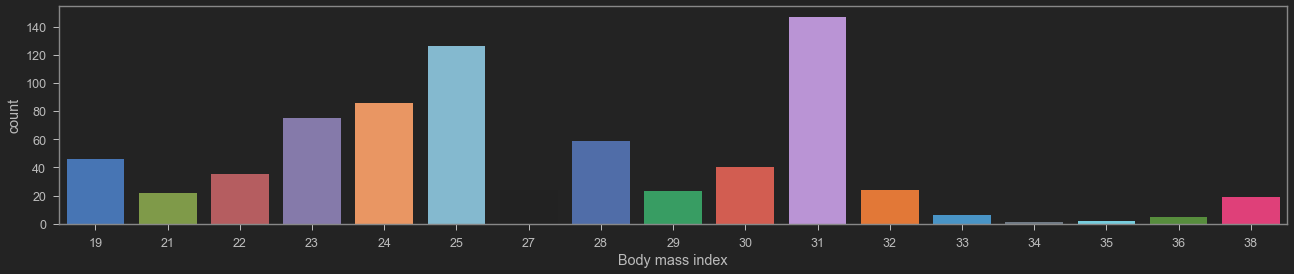

In [105]:
plt.figure(figsize=(22,4))
sns.countplot(df['Body mass index']);

#### Drop 'Body mass index'
Because it is just another representation of 'Weight'.

In [106]:
df.drop('Body mass index', axis=1, inplace=True)

#### Absenteeism time in hours:

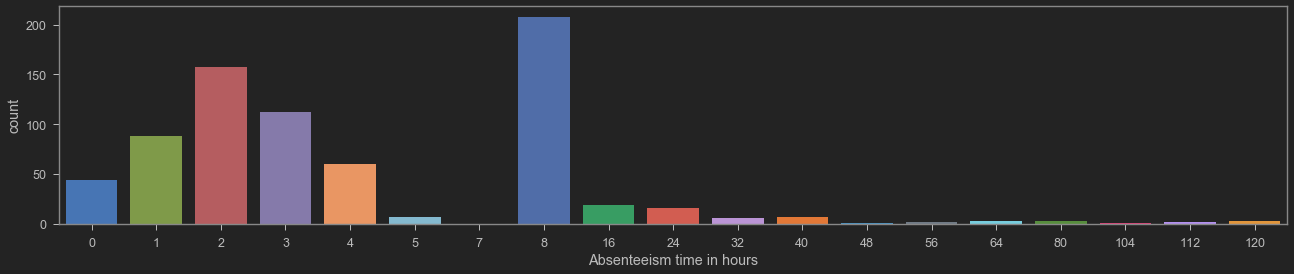

In [107]:
plt.figure(figsize=(22,4))
sns.countplot(df['Absenteeism time in hours']);

### Excessive absenteeism:
Using binary categories with a threshold of a median of absence time.

In [108]:
# df['Absenteeism time in hours'].median()

# df['Excessive absenteeism'] = np.where(df['Absenteeism time in hours'] > 
#                                        df['Absenteeism time in hours'].median(), 1, 0)

#df.drop('Absenteeism time in hours', axis=1, inplace=True)

## Further EDA:

### Absenteeism time per reason for absence by drinking:

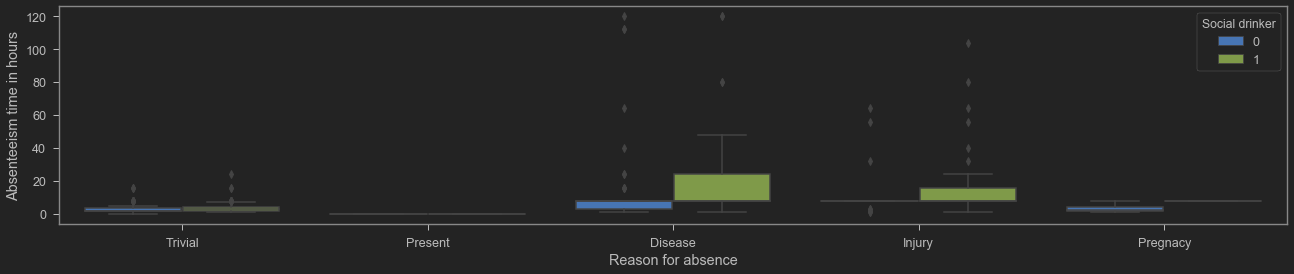

In [109]:
plt.figure(figsize=(22,4))
sns.boxplot(x='Reason for absence',
            y='Absenteeism time in hours',
            hue='Social drinker',
            data=df);

### Absenteeism time per reason for absence by smoking:

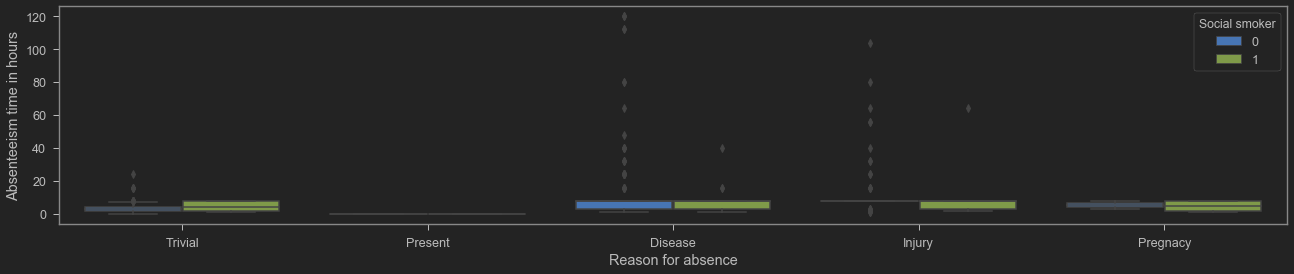

In [110]:
plt.figure(figsize=(22,4))
sns.boxplot(x='Reason for absence',
            y='Absenteeism time in hours',
            hue='Social smoker',
            data=df);

### Absenteeism time per reason for absence by number of kids:

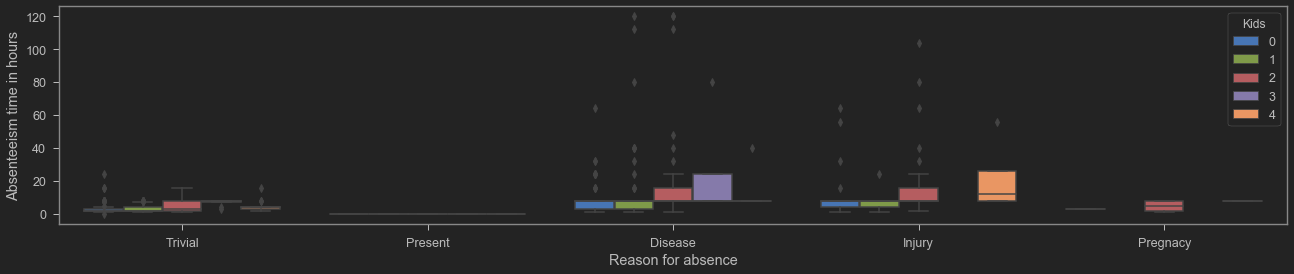

In [111]:
plt.figure(figsize=(22,4))
sns.boxplot(x='Reason for absence',
            y='Absenteeism time in hours',
            hue='Kids',
            data=df);

### Absenteeism time per weekday by number of kids:

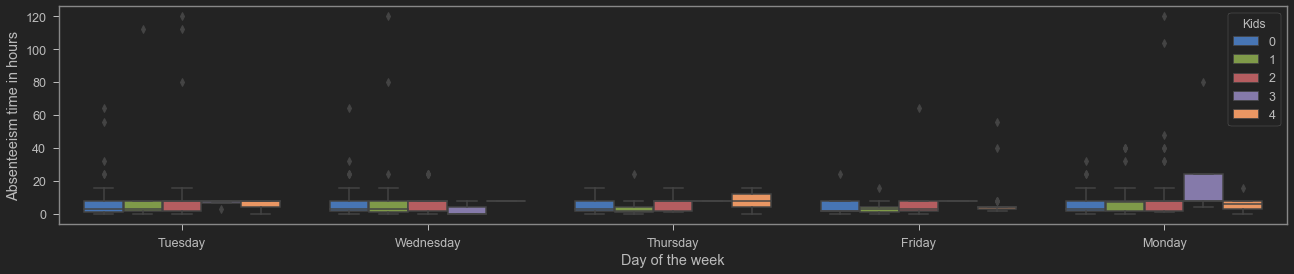

In [112]:
plt.figure(figsize=(22,4))
sns.boxplot(x='Day of the week',
            y='Absenteeism time in hours',
            hue='Kids',
            data=df);

#### Separating the target column from the dataset:
Clustering is an unsupervised technique. The target column, required for classification is kept only for checks.

In [113]:
X = df.drop('Absenteeism time in hours', axis=1)
y = df['Absenteeism time in hours']

#### Dummies - Reason for absence:

In [114]:
df_reason = pd.get_dummies(X['Reason for absence'])
df_reason.drop('Present', axis=1, inplace=True)
X.drop('Reason for absence', axis=1, inplace=True)

#### Dummies - Reason for month:

In [115]:
df_month = pd.get_dummies(X['Month of absence'])
df_month.drop('Present', axis=1, inplace=True)
X.drop('Month of absence', axis=1, inplace=True)

#### Get dummies for all:

In [116]:
X = pd.get_dummies(X, drop_first=True)

#### Concatenate dummy DataFrames to original DataFrame:

In [117]:
X = pd.concat([X, df_reason, df_month], axis=1)

## Final DataFrame:

In [118]:
X.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Kids', 'Social drinker', 'Social smoker',
       'Pets', 'Weight', 'Height', 'Day of the week_Monday',
       'Day of the week_Thursday', 'Day of the week_Tuesday',
       'Day of the week_Wednesday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Education_HS', 'Education_MscPhd',
       'Education_Postgrad', 'Disease', 'Injury', 'Pregnacy', 'Trivial',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [119]:
pd.set_option('display.max_columns', 100)
X

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Kids,Social drinker,Social smoker,Pets,Weight,Height,Day of the week_Monday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Education_HS,Education_MscPhd,Education_Postgrad,Disease,Injury,Pregnacy,Trivial,April,August,December,February,January,July,June,March,May,November,October,September
0,289,36,13,33,239.554,97,0,2,1,0,1,90,172,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,118,13,18,50,239.554,97,1,1,1,0,0,98,178,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,179,51,18,38,239.554,97,0,0,1,0,0,89,170,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,279,5,14,39,239.554,97,0,2,1,1,0,68,168,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,289,36,13,33,239.554,97,0,2,1,0,1,90,172,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,289,36,13,33,264.604,93,0,2,1,0,1,90,172,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
736,235,11,14,37,264.604,93,0,1,0,0,1,88,172,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
737,118,14,13,40,271.219,95,0,1,1,0,8,98,170,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
738,231,35,14,39,271.219,95,0,2,1,0,2,100,170,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


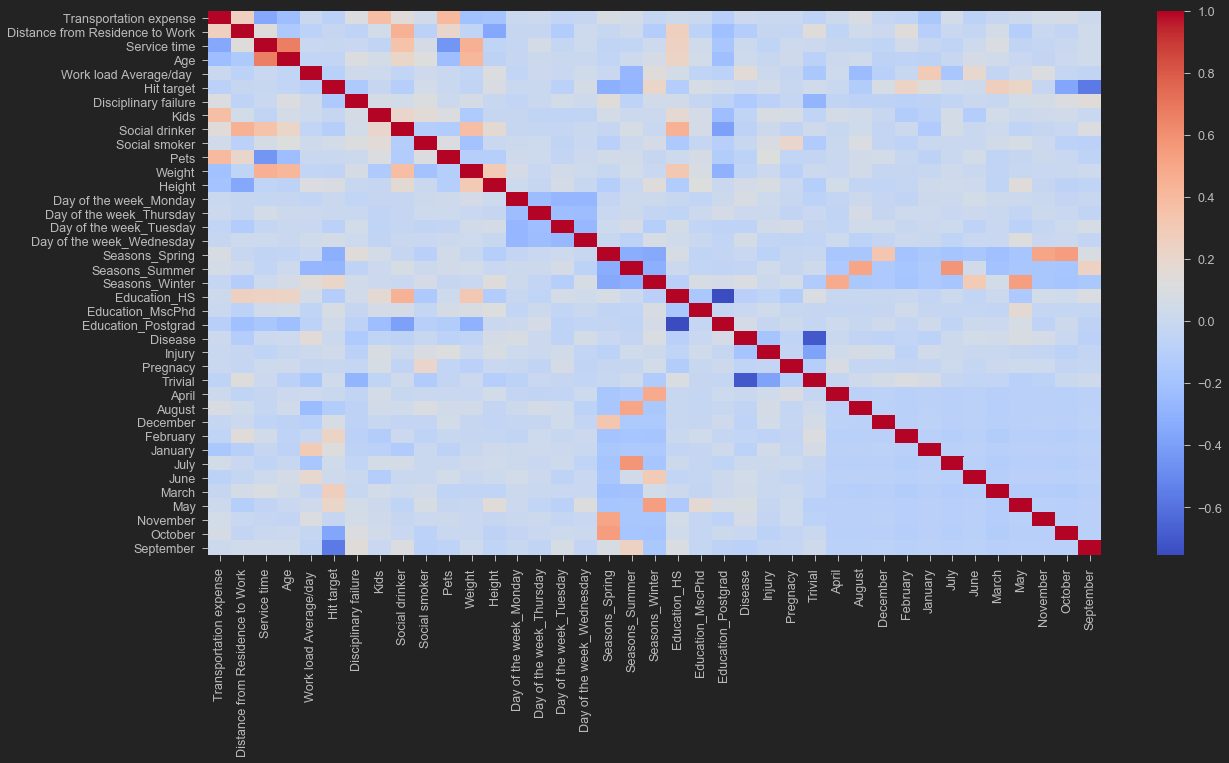

In [120]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), cmap='coolwarm');

## Scaling:

In [121]:
from sklearn.preprocessing import StandardScaler

continuous_columns = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average/day ', 'Hit target', 'Kids', 'Pets', 'Weight', 'Height']
scaler = StandardScaler()
X.loc[:, continuous_columns] = scaler.fit_transform(X.loc[:, continuous_columns])

In [122]:
X

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Kids,Social drinker,Social smoker,Pets,Weight,Height,Day of the week_Monday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Education_HS,Education_MscPhd,Education_Postgrad,Disease,Injury,Pregnacy,Trivial,April,August,December,February,January,July,June,March,May,November,October,September
0,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0,0.893723,1,0,0.192850,0.851673,-0.019046,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,1,-0.017234,1,0,-0.566240,1.473056,0.975828,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,0,-0.928191,1,0,-0.566240,0.774000,-0.350671,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,0,0.893723,1,1,-0.566240,-0.857131,-0.682295,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0,0.893723,1,0,0.192850,0.851673,-0.019046,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,0,0.893723,1,0,0.192850,0.851673,-0.019046,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
736,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,0,-0.017234,0,0,0.192850,0.696327,-0.019046,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
737,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,0,-0.017234,1,0,5.506478,1.473056,-0.350671,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
738,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,0,0.893723,1,0,0.951940,1.628402,-0.350671,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## PCA:
Principal component analysis. 
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19477321, 0.12608046])

The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance.

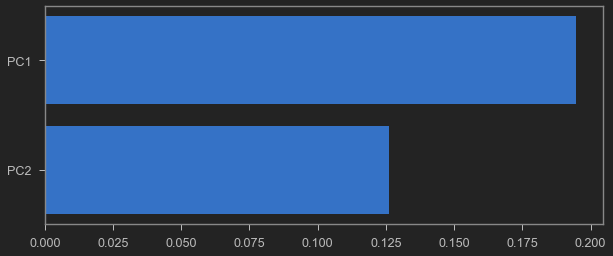

In [124]:
plt.figure(figsize=(10,4))
plt.barh(y=['PC2', 'PC1'], width=sorted(explained_variance));

### Principal components for each row:

In [125]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.489667,0.935495
1,-3.371068,-0.235860
2,-1.416839,1.162362
3,0.084299,0.100715
4,0.498082,0.966007
...,...,...
735,0.487138,0.968297
736,-0.438037,-0.589666
737,0.408801,0.180457
738,-0.367997,1.235820


In [126]:
pca.components_

array([[ 4.05293428e-01,  1.56571714e-01, -4.98685160e-01,
        -4.43884359e-01,  7.52445994e-03, -6.53613004e-03,
        -1.85395806e-03,  1.59665875e-01, -7.28557952e-02,
         6.68276772e-03,  3.78225966e-01, -4.02888670e-01,
        -1.59167986e-01, -4.05892021e-04, -3.43577977e-03,
        -1.18508540e-02, -4.67185178e-03,  2.26584632e-02,
         5.21520304e-03, -1.75268104e-02, -4.19920244e-02,
        -2.04725773e-03,  2.19950888e-02, -9.92860066e-03,
         7.92378908e-03,  1.77776979e-04,  4.35229842e-03,
         5.26296553e-04,  4.63345486e-03,  8.24981185e-03,
        -1.17933092e-03, -7.25363094e-03,  4.73339348e-03,
        -7.90881873e-03, -7.72729685e-03, -1.28906495e-03,
         7.21079525e-03,  5.29178011e-03, -4.61608396e-03],
       [ 3.03600255e-01,  5.29286735e-01,  3.37376435e-01,
         2.91638427e-01, -1.34248564e-01, -1.88977087e-01,
         1.41466940e-02,  2.75734502e-01,  1.87859848e-01,
         4.74639083e-03,  1.08003866e-01,  1.14917621e-

In [127]:
X.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Kids', 'Social drinker', 'Social smoker',
       'Pets', 'Weight', 'Height', 'Day of the week_Monday',
       'Day of the week_Thursday', 'Day of the week_Tuesday',
       'Day of the week_Wednesday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Education_HS', 'Education_MscPhd',
       'Education_Postgrad', 'Disease', 'Injury', 'Pregnacy', 'Trivial',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [128]:
df_comp = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
df_comp

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Kids,Social drinker,Social smoker,Pets,Weight,Height,Day of the week_Monday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Education_HS,Education_MscPhd,Education_Postgrad,Disease,Injury,Pregnacy,Trivial,April,August,December,February,January,July,June,March,May,November,October,September
PC1,0.405293,0.156572,-0.498685,-0.443884,0.007524,-0.006536,-0.001854,0.159666,-0.072856,0.006683,0.378226,-0.402889,-0.159168,-0.000406,-0.003436,-0.011851,-0.004672,0.022658,0.005215,-0.017527,-0.041992,-0.002047,0.021995,-0.009929,0.007924,0.000178,0.004352,0.000526,0.004633,0.008250,-0.001179,-0.007254,0.004733,-0.007909,-0.007727,-0.001289,0.007211,0.005292,-0.004616
PC2,0.303600,0.529287,0.337376,0.291638,-0.134249,-0.188977,0.014147,0.275735,0.187860,0.004746,0.108004,0.114918,-0.443662,-0.007027,0.003116,-0.027396,-0.000902,0.041752,0.042620,-0.055648,0.130468,-0.001791,-0.090289,-0.045097,-0.007367,0.000403,0.036089,-0.008851,0.025613,-0.003084,-0.001954,-0.038714,0.005377,-0.014367,0.008560,-0.037163,0.002528,0.026231,0.033999


### Heatmap of the relation between the correlation of the various features and principal components:
In practice, principal components are the combinations of all previous features but some are correlated more, some less:

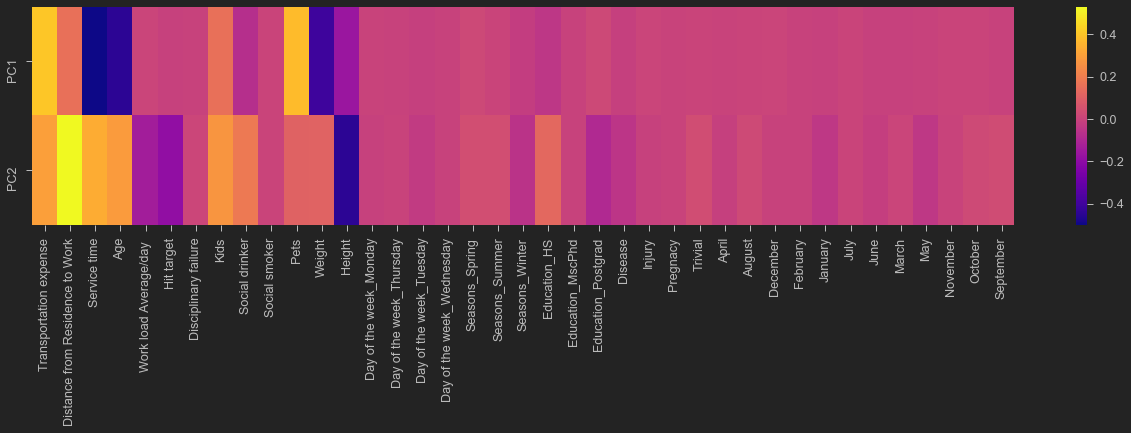

In [129]:
plt.figure(figsize=(22,4))
sns.heatmap(df_comp, cmap='plasma');

## Elbow method:
WCSS (Within-Cluster-Sum-of-Squares) is the sum of squares of the distances of each data point in all clusters to their respective centroids.

In [130]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 31):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++', #helps with fixing kmeans' inherent initialization sensitivity
                    random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_) #append: 'sum of squared distances of samples to their closest cluster center'

#### Plotting elbow method results:

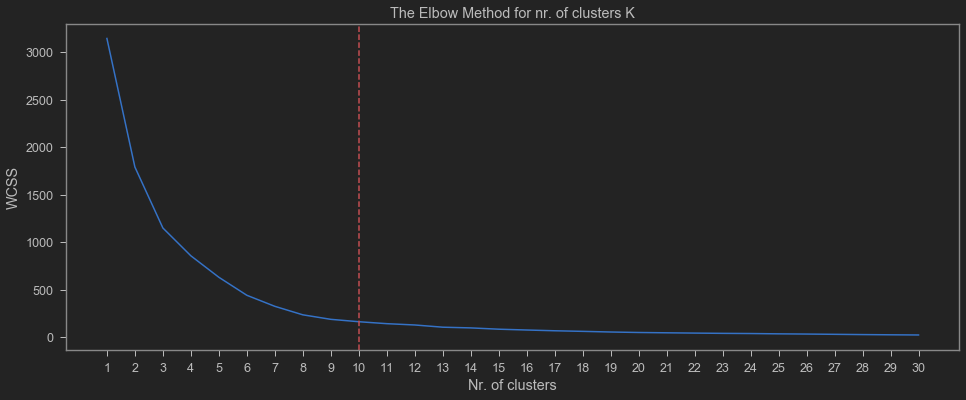

In [131]:
plt.figure(figsize=(16,6))

plt.plot(range(1, 31), wcss)

plt.title('The Elbow Method for nr. of clusters K')
plt.xlabel('Nr. of clusters')
plt.ylabel('WCSS')
plt.xticks(ticks=np.arange(1,31))
plt.axvline(x=10, color='r', linestyle='--')
plt.show()

## K-Means with chosen K clusters:

In [132]:
kmeans = KMeans(n_clusters=10,
                init='k-means++',
                random_state=42)

y_kmeans = kmeans.fit_predict(X_pca)

### Plotting clustering results:

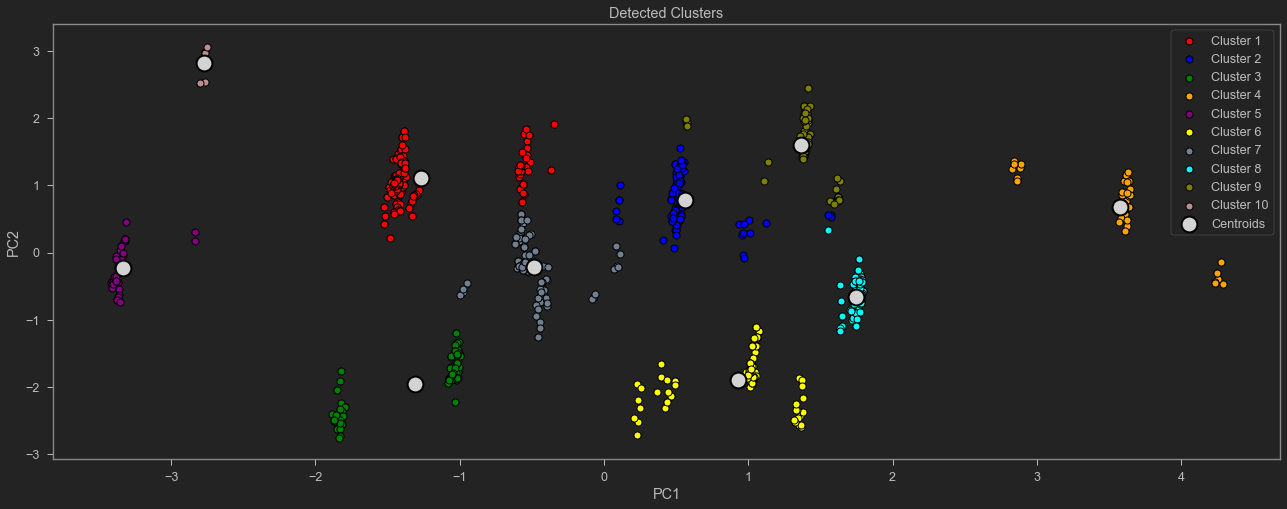

In [133]:
plt.figure(figsize=(22,8))

colors=['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'slategrey', 'cyan', 'olive', 'rosybrown']

for k in np.arange(0,10):
    plt.scatter(X_pca[y_kmeans == k, 0], #[rows, principal component 1]
                X_pca[y_kmeans == k, 1], #[rows, principal component 2]
                s=50, 
                c=colors[k],
                edgecolor='black', 
                linewidth='1',
                label=f'Cluster {k+1}')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=250, 
            c='lightgrey',
            edgecolor='black', 
            linewidth='2',
            label='Centroids')

plt.title('Detected Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Dendrogram
Another approach to find optimal number of clusters:

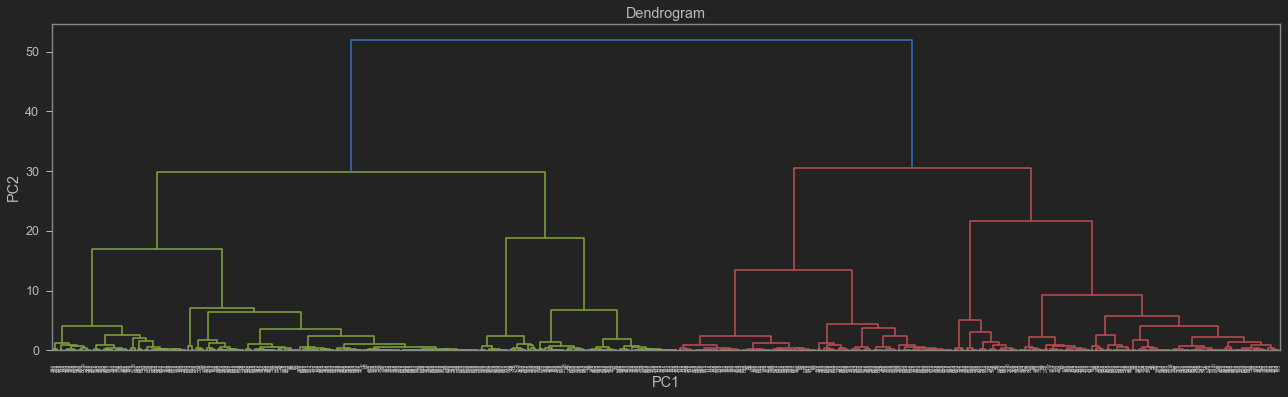

In [134]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(22,6))

dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward')) #Ward variance minimization algorithm

plt.title('Dendrogram')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The longest vertical line which is not intersected by any horizontal line is blue: 2 clusters.

In [135]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca)

### Plotting clustering results:

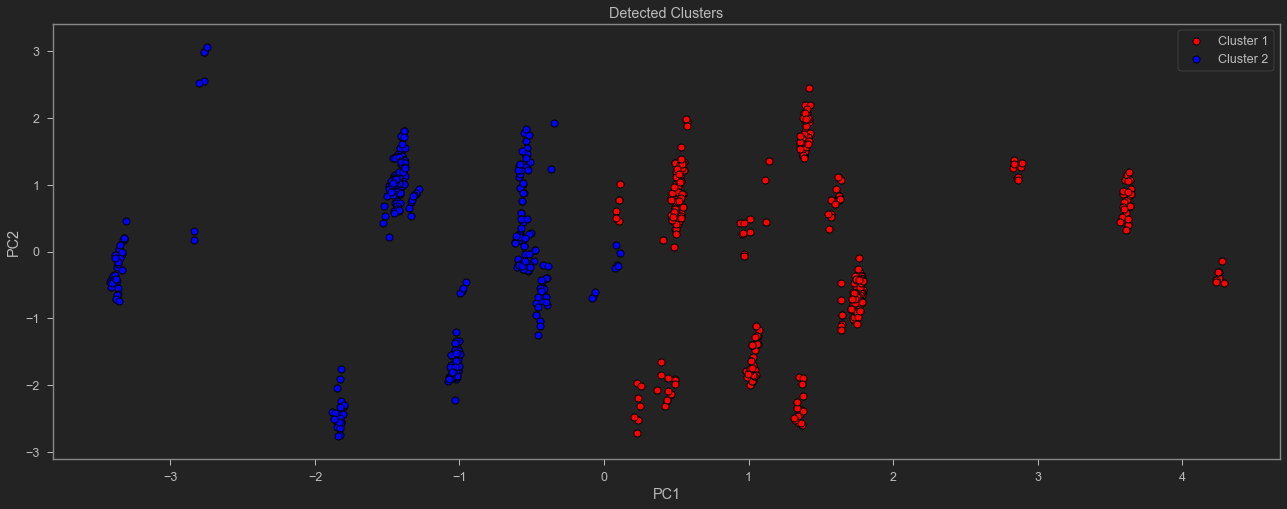

In [136]:
plt.figure(figsize=(22,8))

colors=iter(['red', 'blue'])

for k in np.arange(0,2):
    plt.scatter(X_pca[y_hc == k, 0], #[rows, principal component 1]
                X_pca[y_hc == k, 1], #[rows, principal component 2]
                s=50, 
                c=next(colors),
                edgecolor='black', 
                linewidth='1',
                label=f'Cluster {k+1}')

plt.title('Detected Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### Total execution time:

In [137]:
print(datetime.now() - startTime)

0:00:30.856299
